<a href="https://colab.research.google.com/github/CloneTerial/Ai-/blob/main/Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

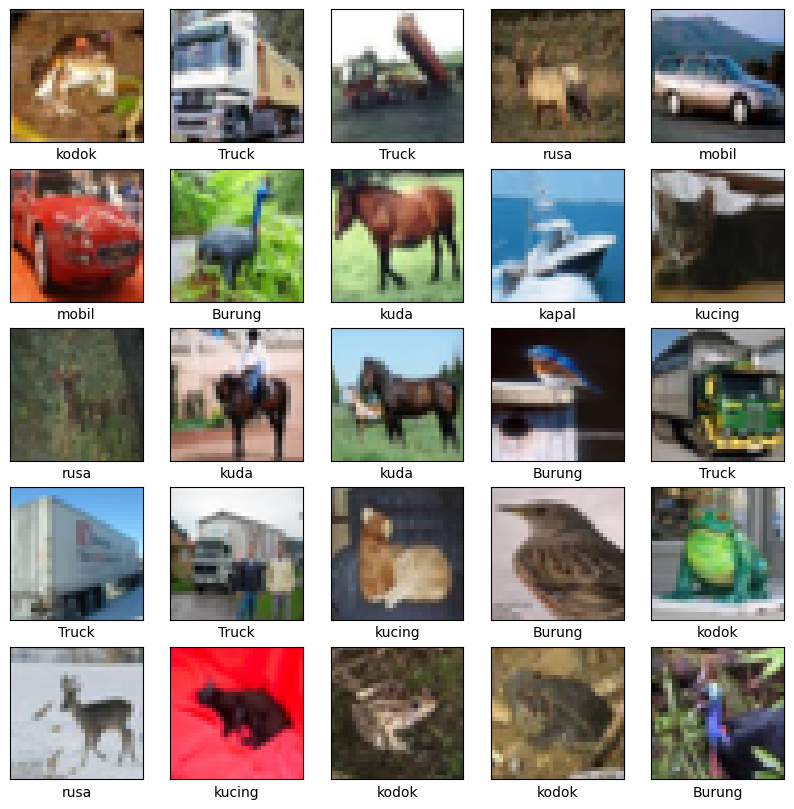

In [30]:

# CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalisasi nilai pixel (0-255 menjadi 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode label
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Tampilkan contoh data
class_names = ['pesawat', 'mobil', 'Burung', 'kucing', 'rusa', 'anjing', 'kodok', 'kuda', 'kapal', 'Truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i].argmax()])
plt.show()

In [31]:
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
   MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
   Dense(64, activation='relu'),
    Dropout(0.5),  # Mengurangi overfitting
    Dense(10, activation='softmax')  # Output layer untuk 10 kelas
])

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Latih Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2794 - loss: 1.9283 - val_accuracy: 0.5119 - val_loss: 1.3220
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4963 - loss: 1.4011 - val_accuracy: 0.5753 - val_loss: 1.1909
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5548 - loss: 1.2621 - val_accuracy: 0.6064 - val_loss: 1.1146
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5862 - loss: 1.1758 - val_accuracy: 0.6303 - val_loss: 1.0597
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6130 - loss: 1.1076 - val_accuracy: 0.6440 - val_loss: 1.0195
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6345 - loss: 1.0420 - val_accuracy: 0.6550 - val_loss: 0.9763
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6578 - loss: 0.9861 - val_accuracy: 0.6750 - val_loss: 0.9270
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6708 - loss: 0.9512 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6922 - loss: 0.9108
Test accuracy: 0.69


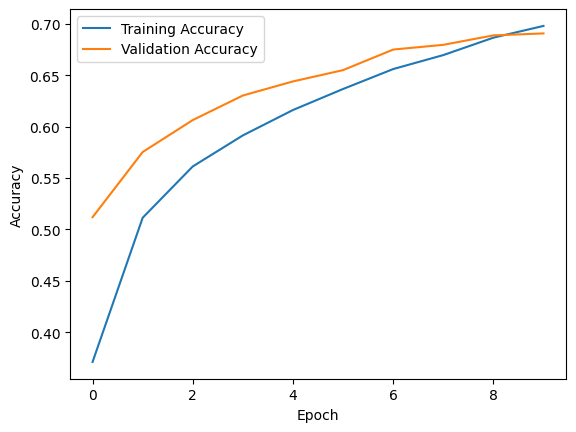

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.2f}")


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


model.save('cifar10_image_classifier.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


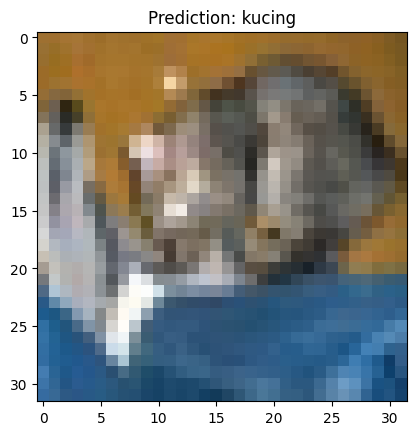

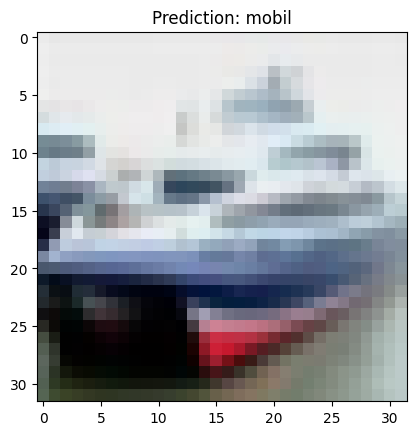

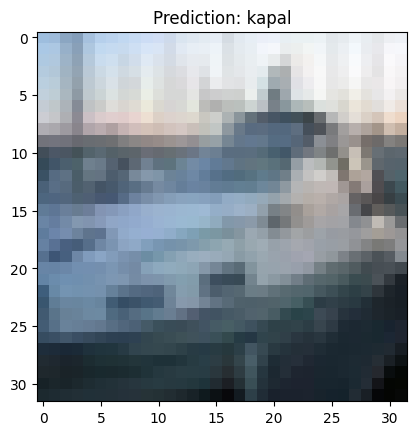

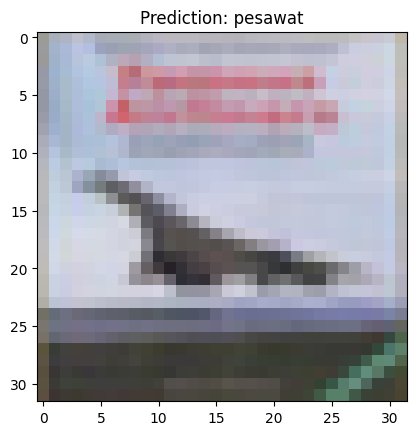

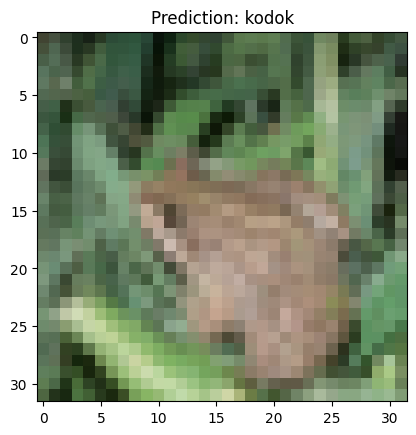

In [34]:
#Prediksi Contoh
predictions = model.predict(test_images[:5])

#Tampilkan hasil prediksi
for i in range(5):
    plt.imshow(test_images[i])
    plt.title(f"Prediction: {class_names[predictions[i].argmax()]}")
    plt.show()

In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

# memuat dan memproses gambar
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Ubah ukuran gambar ke (32, 32)
    img_array = image.img_to_array(img)  # Konversi ke array NumPy
    img_array = img_array / 255.0       # Normalisasi nilai pixel
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted: pesawat


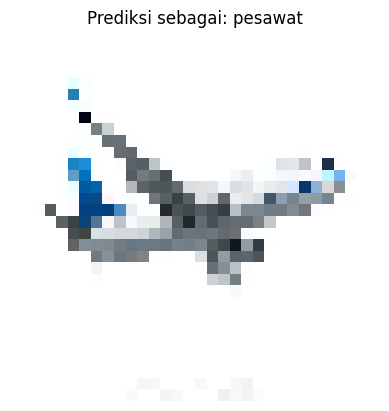

In [39]:
# path ke gambar
custom_image_path = '0.jpeg'

# Preprocess gambar
custom_image = preprocess_image(custom_image_path)

# Prediksi dengan model
prediction = model.predict(custom_image)

# Tampilkan hasil prediksi
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted: {predicted_class}")
img = image.load_img(custom_image_path, target_size=(32, 32))
plt.imshow(img)
plt.title(f"Prediksi sebagai: {predicted_class}")
plt.axis('off')
plt.show()